>[Градієнт](#scrollTo=xz9Rzf-4k0oz)

>[Гессіан](#scrollTo=zK1dpYovvk7-)

>[Якобіан](#scrollTo=-wHPcczX-LkQ)

>[Метод градієнтного спуску](#scrollTo=OQhlskmDBz4h)

>>[Задача регресії](#scrollTo=MMi4QMVvIdGt)

>>[Стохастичний градієнтний спуск (SGD)](#scrollTo=wyPpIge6Cd-N)

>>[Моменти градієнтів](#scrollTo=8QMMfgsmCnXV)

>>[Метод RMSprop (Root Mean Square Propagation)](#scrollTo=_0pUEqj8CtJL)

>>[Метод Adam (Adaptive Moment Estimation)](#scrollTo=BTC8y_bKCzj_)

>>[Метод Nadam](#scrollTo=u1c5972vC88x)

>[Додаткові матеріали](#scrollTo=TgJJAqKSQciK)



#Градієнт

Обчислення засобами Numpy

In [ ]:
import numpy as np

def gradient(func, x):
    x = np.array(x, dtype=float)
    # Ініціалізуємо градієнт з усіма нулями такоголементами
    grad = np.zeros_like(x)

    # Обчислюємо часткові похідні для кожної змінної
    # Використовуємо центральну різницеву схему для чисельного обчислення похідних
    h = 1e-6  # дуже мале число для обчислення похідних

    for i in range(len(x)):
        x_plus_h = x.copy()
        #print(x_plus_h[i], h)
        x_plus_h[i] += h
        #print(x_plus_h[i], h)
        grad[i] = (func(*x_plus_h) - func(*x)) / h
        #print(grad[i])

    return grad

# Приклад використання:

def my_function(x, y, z):
    return 3*(x**2 + y*z)

point = (2, 3, 4)
grad = gradient(my_function, point)
print("Градієнт у точці", point, ":", grad)


2.0 1e-06
2.000001 1e-06
12.000002996614967
3.0 1e-06
3.000001 1e-06
11.999999998124622
4.0 1e-06
4.000001 1e-06
8.999999998593466
Градієнт у точці (2, 3, 4) : [12.000003 12.        9.      ]


Обчислення засобами SymPy

In [ ]:
import sympy
x1 = sympy.symbols('x1')
x2 = sympy.symbols('x2')
x3 = sympy.symbols('x3')

def f(x1, x2, x3):
    return 3*(x1**2 + x2*x3)

u = f(x1, x2, x3)
print('f(x1, x2, x3) = ',u)

gradient_fun = [u.diff(x1), u.diff(x2), u.diff(x3)]
print('gradient function =', gradient_fun)

gradient_val = [g.subs({x1: 2, x2: 3, x3: 4}) for g in gradient_fun]
print('gradient values =', gradient_val)

f(x1, x2, x3) =  3*x1**2 + 3*x2*x3
gradient function = [6*x1, 3*x3, 3*x2]
gradient values = [12, 12, 9]


#Гессіан

Обчислемо Гессіан для функції

$f(x,y)=x^3-2xy-y^6$

в точці $(1,2)$

Обчислення засобами SymPy

In [ ]:
import sympy as sp

def hessian_matrix(func, vars, point):
    n = len(vars)
    hessian = sp.zeros(n, n)

    # Створюємо символьні змінні для обчислення часткових похідних
    symbols = vars
    gradients = [sp.Symbol(f'd{sym}') for sym in symbols]

    # Обчислюємо часткові похідні за допомогою SymPy
    for i, var1 in enumerate(symbols):
        for j, var2 in enumerate(symbols):
            # Обчислюємо часткову другу похідну
            hessian[i, j] = sp.diff(func, var1, var2)

    # Підставляємо значення змінних у матрицю Гессіана для заданої точки
    hessian_evaluated = np.array(hessian.subs({var: val for var, val in zip(symbols, point)}))

    return hessian, hessian_evaluated

# Приклад використання:

# Створюємо символьні змінні x і y
x, y = sp.symbols('x y')

# Задаємо символьну функцію
func = x**3 - 2*x*y - y**6

# Визначаємо список змінних для обчислення матриці Гессіана
vars = [x, y]

# Задаємо точку, в якій потрібно обчислити матрицю Гессіана
point = (1, 2)

# Обчислюємо матрицю Гессіана в заданій точці
hess, hess_at_point = hessian_matrix(func, vars, point)

# Виводимо результат
print("Матриця Гессе:\n", np.array(hess))
print("Матриця Гессе у точці", point, ":\n", hess_at_point)


Матриця Гессе:
 [[6*x -2]
 [-2 -30*y**4]]
Матриця Гессе у точці (1, 2) :
 [[6 -2]
 [-2 -480]]


#Матриця Якобі

Розрахуємо Якобіан для системи функцій

$f_1(x,y,z) = x^2 + y^2$

$f_2(x,y,z) = xyz$

$f_3(x,y,z) = x^3+z^3$

в точці $(1, 2, 4)$


Для перевірки результатів

https://www.wolframalpha.com/input?i=Jacobian+matrix+of+%5B%2F%2Fmath%3A%28x%5E2%2By%5E2%2C+x*y*z%2C+x%5E3%2Bz%5E3%29%2F%2F%5D+with+respect+to+%5B%2F%2Fmath%3A%28x%2Cy%2Cz%29%2F%2F%5D


In [ ]:
import sympy as sp
import numpy as np

def jacobian_matrix(funcs, vars, point):
    m = len(funcs)  # Кількість функцій у системі
    n = len(vars)   # Кількість змінних

    # Створюємо матрицю Якобіана як символьну матрицю
    jacobian = sp.Matrix(m, n, lambda i, j: sp.diff(funcs[i], vars[j]))

    # Підставляємо значення змінних у матрицю Якобіана для заданої точки
    jacobian_evaluated = jacobian.subs({var: val for var, val in zip(vars, point)})

    # Перетворюємо матрицю SymPy у масив NumPy
    jacobian_numerical = np.array(jacobian_evaluated.tolist(), dtype=float)

    return jacobian, jacobian_numerical

# Приклад використання:

# Створюємо символьні змінні
x, y, z = sp.symbols('x y z')

# Задаємо систему функцій
f1 = x**2 + y**2
f2 = x*y*z
f3 = x**3+z**3

# Список функцій у системі
funcs = [f1, f2, f3]

# Список змінних
vars = [x, y, z]

# Задаємо точку, в якій потрібно обчислити матрицю Якобіана
point = (1, 2, 4)

# Обчислюємо матрицю Якобіана в заданій точці
jacobian, jacobian_at_point = jacobian_matrix(funcs, vars, point)

# Виводимо результат
print("Матриця Якобіана :\n", np.array(jacobian))
print("Матриця Якобіана у точці", point, ":\n", jacobian_at_point)


Матриця Якобіана :
 [[2*x 2*y 0]
 [y*z x*z x*y]
 [3*x**2 0 3*z**2]]
Матриця Якобіана у точці (1, 2, 4) :
 [[ 2.  4.  0.]
 [ 8.  4.  2.]
 [ 3.  0. 48.]]


#Метод градієнтного спуску

Розглянемо далі застосування методів градієнтного спуску для розв'язання задачі регресії

##Задача регресії

Задача регресії є однією з основних задач аналізу даних, де основною метою є побудова моделі для прогнозування числового вихідного значення на основі вхідних даних.

Для типової задачі регресії, де ми маємо ознаки $ x_1, x_2, x_3, \ldots, x_n $ і відповідні значення цільової функції $ y_1, y_2, y_3, \ldots, y_n $, можна побудувати таблицю, яка покаже взаємозв'язок між цими ознаками і цільовими значеннями. Така таблиця допоможе візуалізувати дані, які використовуються для навчання моделі регресії.

Нижче наведений приклад таблиці для задачі регресії:


\begin{array}{|c|c|c|c|c|c|}
\hline
\text{№} & x_1 & x_2 & x_3 & \ldots & x_n & y \\
\hline
1 & x_{1,1} & x_{2,1} & x_{3,1} & \ldots & x_{n,1} & y_1 \\
2 & x_{1,2} & x_{2,2} & x_{3,2} & \ldots & x_{n,2} & y_2 \\
3 & x_{1,3} & x_{2,3} & x_{3,3} & \ldots & x_{n,3} & y_3 \\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots & \vdots \\
m & x_{1,m} & x_{2,m} & x_{3,m} & \ldots & x_{n,m} & y_m \\
\hline
\end{array}


У цій таблиці:
- Кожен рядок (номерований від 1 до $ m $) представляє один навчальний приклад.
- $ x_{1,i}, x_{2,i}, x_{3,i}, \ldots, x_{n,i} $ - це значення ознак для $ i $-го навчального прикладу.
- $ y_i $ - це відповідне значення цільової функції для $ i $-го навчального прикладу.

Наприклад, якщо ми маємо задачу прогнозування ціни житла (цільова змінна $ y $) на основі різних ознак, таких як площа квартири ($ x_1 $), кількість спалень ($ x_2 $), відстань від центру міста ($ x_3 $), то відповідна таблиця може виглядати так:


\begin{array}{|c|c|c|c|c|}
\hline
\text{№} & \text{Площа (кв. м)} & \text{Спальні} & \text{Відстань до центру (км)} & \text{Ціна (\$)} \\
\hline
1 & 80 & 2 & 5 & 200,000 \\
2 & 120 & 3 & 10 & 300,000 \\
3 & 60 & 1 & 3 & 150,000 \\
\vdots & \vdots & \vdots & \vdots & \vdots \\
m & 100 & 2 & 8 & 250,000 \\
\hline
\end{array}


Тут:
- $ m $ - кількість навчальних прикладів (спостережень).
- Площа квартири ($ x_1 $), кількість спалень ($ x_2 $), відстань до центру міста ($ x_3 $) - це ознаки.
- Ціна (\$) - це значення цільової функції, яке ми хочемо передбачити.

За допомогою такої таблиці можна підготувати дані для навчання моделі регресії, де ознаки $ x_1, x_2, x_3, \ldots, x_n $ використовуються для побудови моделі, яка прогнозує цінове значення $y $ на основі цих ознак. Після тренування моделі за допомогою цих даних ми зможемо використовувати її для передбачення цінових значень для нових наборів ознак, які не були використані під час тренування.


Розглянемо регресійну модель в загальному вигляді

$h(\vec{x}) = w_0 +w_1x_1+w_2x_2+w_3x_3+...+w_nx_n$.

Введемо додаткову ознаку $x_0=1$, тоді ми зможемо переписати цей вираз у векторній формі

$\displaystyle h(\vec{x})=\vec{w} \cdot \vec{x}$,

де вектор ознак $\vec{x}$ та вектор параметрів (ваг) $\vec{w}$, мають вигляд

$\vec{x} = \begin{pmatrix}
1\\
x_1\\
x_2\\
x_3\\
...\\
x_n\\
\end{pmatrix},$
$\vec{w} = \begin{pmatrix}
w_0\\
w_1\\
w_2\\
w_3\\
...\\
w_n\\
\end{pmatrix}$


**Функція втрат** в контексті задачі регресії визначає, як добре модель регресії передбачає цільові значення на основі вхідних ознак. Ця функція вимірює рівень помилок між фактичними значеннями цільової змінної і значеннями, передбаченими моделлю.

У загальному вигляді функція втрат $ L $ може бути записана як функція, яка залежить від прогнозованих значень моделі $ h(\vec{x_i}) $ і фактичних значень цільової змінної y_i. Така функція приймає на вхід значення $ h(\vec{x_i}) $ (прогнозовані значення) і $ y_i $ (справжні значення) для кожного навчального прикладу $ i $.

Найпоширеніші функції втрат для задачі регресії включають середньоквадратичну помилку (Mean Squared Error, MSE).
Для випадку, коли модель передбачає тільки дві ознаки,
**середньоквадратична помилка (MSE)** набуває вигляду:
   
$\displaystyle J(w_0, w_1) = \frac{1}{2m} \sum_{i=1}^{m} (h(x_i) - y_i)^2, $

де

- $ y_i $ - справжні значення цільової змінної,
- $ h(x_i) $ - прогнозовані значення цільової змінної для навчального прикладу $ i $,
- $ m $ - кількість навчальних прикладів.

**Градієнт середньоквадратичної помилки** у загальному вигляді:

$\displaystyle \bigtriangledown J(\vec{w})=\displaystyle \begin{pmatrix}
\frac{\partial J(\vec{w})}{\partial w_0}\\
\frac{\partial J(\vec{w})}{\partial w_1}\\
\frac{\partial J(\vec{w})}{\partial w_2}\\
\ldots\\
\frac{\partial J(\vec{w})}{\partial w_n}
\end{pmatrix}=
\begin{pmatrix}
\frac{1}{m}\sum_{i=1}^{m}(h(x_i)-y_i)\\
\frac{1}{m}\sum_{i=1}^{m}(h(x_i)-y_i)x_{1,i}\\
\frac{1}{m}\sum_{i=1}^{m}(h(x_i)-y_i)x_{2,i}\\
\ldots\\
\frac{1}{m}\sum_{i=1}^{m}(h(x_i)-y_i)x_{n,i}
\end{pmatrix}$



Ну а відповідно одна ітерація навчання, чи крок нашого градієнтного спуску буде мати такий вигляд:

$\vec{w}=\vec{w_{prev}}-\alpha \cdot \bigtriangledown J(\vec{w})$

Якщо ми введемо ще матрицю значень нашого датасету, то взагалі можемо робити векторні обчислення, замість сумування циклами:

$X = \begin{bmatrix}
1 & x_{1,1}  & x_{2,1} & x_{3,1} & \ldots & x_{n,1}\\
1 & x_{1,2} & x_{2,2} & x_{3,2} & \ldots & x_{n,2}\\
1 & x_{1,3} & x_{2,3} & x_{3,3} & \ldots & x_{n,3}\\
\vdots & \vdots & \vdots & \vdots & \ddots & \vdots \\
1 & x_{1,m} & x_{2,m}  & x_{3,m} & \ldots & x_{n,m}
\end{bmatrix}.$

Тоді матимемо такі формули для обчислень:

$\displaystyle \bigtriangledown J(\vec{w})= \frac{\alpha}{m} X^T(X\cdot \vec{w}- \vec{y}),$

$\displaystyle \vec{w}=\vec{w_{prev}}-\frac{\alpha}{m} X^T(X\cdot \vec{w}- \vec{y}).$

Ці формули можна використовувати при реалізації метода градієнтного спуску для задачі лінійної регресії при великій кількості ознак та ваг моделі.






##Стохастичний градієнтний спуск (SGD)

Є одним з найпростіших та широко використовуваних методів оптимізації в машинному навчанні. Основна ідея полягає в тому, щоб оновлювати параметри моделі, використовуючи градієнт відносно одного випадкового прикладу даних з набору даних. Це дозволяє ефективно оптимізувати функцію втрат на великих наборах даних та швидше досягати збіжності.

Основні кроки роботи SGD:

1. Вибирається випадковий приклад даних з набору даних.
2. Обчислюється градієнт відносно цього прикладу.
3. Оновлюються параметри моделі відповідно до градієнту та обраного розміру кроку (швидкості навчання).
4. Процес повторюється до досягнення умови зупинки або певної кількості ітерацій.

У цьому прикладі ми використовуємо SGD для навчання параметрів лінійної регресії на випадкових даних `X` та `y`. Функція `linear_regression_sgd` виконує ітерації за епохами та обчислює градієнт відносно кожного випадкового прикладу, щоб оновити параметри моделі.

In [ ]:
import numpy as np
np.random.seed(42)


def linear_regression_sgd(X, y, learning_rate=0.1, epochs=1000):
    m, n = X.shape
    theta = np.random.randn(n, 1)  # ініціалізуємо випадковими значеннями параметри моделі

    for _ in range(epochs):
        # Обчислюємо градієнт відносно одного випадкового прикладу
        gradient = 2/m * X.T.dot(X.dot(theta) - y)

        # Оновлюємо параметри моделі
        theta -= learning_rate * gradient

    return theta

# Приклад використання
# Згенеруємо випадкові дані для регресії
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Додаємо стовпець одиниць для зсуву (bias term)
X_b = np.c_[np.ones((100, 1)), X]

# Викликаємо функцію для SGD
theta = linear_regression_sgd(X_b, y)
print("Значення параметрів моделі:", theta)


Значення параметрів моделі: [[4.21509616]
 [2.77011339]]


##Моменти градієнтів

У контексті оптимізації градієнтний спуск може використовувати інформацію про попередні кроки для оновлення параметрів моделі. Моменти градієнту (або просто "моменти") є концепцією, що використовується для покращення збіжності градієнтного спуску шляхом збереження попередніх градієнтів.

Основна ідея полягає в тому, щоб надати "момент" кожному оновленню параметрів, що допомагає зберігати напрямок оновлення. Це робить градієнтний спуск більш стійким і швидким, особливо в глибоких архітектурах нейронних мереж.

Найпоширенішим методом, що використовує моменти, є метод моментів (Momentum), який додає коефіцієнт моменту до оновлення параметрів. Цей коефіцієнт відповідає за те, наскільки сильно будуть впливати попередні кроки на поточний крок. Він регулюється параметром моменту, який зазвичай обирається між 0 і 1.

Інші методи, які використовують моменти, включають Nesterov Accelerated Gradient (NAG), Adagrad, RMSprop, Adam, Adadelta та інші. Вони всі мають різні способи обчислення моментів та різні параметри, які регулюють їхню поведінку.

Наприклад, перший та другий моменти градієнту використовуються в методі Adam, алгоритмі оптимізації, що використовується для оновлення параметрів моделі в глибокому навчанні. Наведемо формули для обчислення цих моментів:

1. Перший момент (також відомий як момент градієнту або експоненціально зважена середня квадратів градієнту):
$ m_t = \beta_1 \cdot m_{t-1} + (1 - \beta_1) \cdot g_t $

2. Другий момент (також відомий як момент квадратів градієнту або експоненціально зважена середня квадратів градієнту):
$ v_t = \beta_2 \cdot v_{t-1} + (1 - \beta_2) \cdot g_t^2 $

У цих формулах:
- $ m_t $ та $ v_t $ - оновлені значення першого та другого моментів на кроці $ t $ відповідно,
- $ \beta_1 $ та $ \beta_2 $ - параметри згладжування, які зазвичай вибираються між 0 і 1,
- $ g_t $ - градієнт функції втрат на кроці $ t $.

Ці моменти використовуються для коригування кроку оновлення параметрів під час навчання моделі.





```
# This is formatted as code
```

##Метод RMSprop (Root Mean Square Propagation)

Є вдосконаленням стандартного градієнтного спуску, яке дозволяє керувати швидкістю навчання для кожного параметра окремо. Він використовує експоненційне зглажування, щоб адаптивно налаштовувати швидкість навчання для кожного параметра.

Основна ідея методу RMSprop полягає в тому, щоб додати покоординатне наведення на градієнт, яке зберігає покоординатне квадратичне середнє попередніх градієнтів.

Нижче наведено приклад реалізації методу RMSprop у Python.


У цьому коді градієнти масштабуються за допомогою квадратного кореня від покоординатного середнього квадратів попередніх градієнтів. Також використовується коефіцієнт зглажування `gamma`, щоб зменшити вплив старих градієнтів.

In [ ]:
import numpy as np
np.random.seed(42)

# Генеруємо випадкові дані для демонстрації
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Додаємо стовбець одиниць до матриці X
X_b = np.c_[np.ones((100, 1)), X]

# Випадково ініціалізуємо вектор параметрів theta
theta = np.random.randn(2,1)

# Встановлюємо гіперпараметри методу RMSprop
eta = 0.1  # крок навчання
gamma = 0.9  # коефіцієнт зглажування
epsilon = 1e-8  # малий додаток для чисельної стійкості
grad_squared = 0  # зберігаємо квадрати градієнтів

# Реалізація методу RMSprop
for iteration in range(1000):
    gradients = 2/100 * X_b.T.dot(X_b.dot(theta) - y)
    grad_squared = gamma * grad_squared + (1 - gamma) * gradients**2
    theta = theta - eta * gradients / (np.sqrt(grad_squared) + epsilon)

# Виведення оцінених параметрів моделі
print("theta:")
print(theta)


theta:
[[4.16509616]
 [2.72011339]]


##Метод Adam (Adaptive Moment Estimation)

Це оптимізаційний алгоритм, який комбінує в собі ідеї двох інших популярних методів: методу градієнтного спуску з моментами (Momentum) та RMSprop. Основна ідея методу Adam полягає в адаптивному регулюванні кроку навчання для кожного параметру окремо з використанням оцінок першого та другого моментів градієнту.

Основні кроки роботи методу Adam:

1. Ініціалізація пам'яті для оцінок першого та другого моментів градієнту.
2. Обчислення градієнту функції втрат для поточних параметрів.
3. Оновлення оцінок першого та другого моментів градієнту з використанням експоненційного зглажування.
4. Корекція зміщення оцінок першого та другого моментів градієнту.
5. Оновлення параметрів моделі за допомогою коригованих оцінок першого та другого моментів градієнту.

У прикладі нижче ми використали метод Adam для оптимізації параметрів лінійної регресії на випадково згенерованих даних.

In [ ]:
import numpy as np
np.random.seed(42)


def adam_optimizer(X, y, learning_rate=0.001, beta1=0.9, beta2=0.999, epsilon=1e-8, num_iterations=10000):
    m = X.shape[0]  # кількість прикладів
    n = X.shape[1]  # кількість ознак

    # Ініціалізація параметрів моделі
    theta = np.random.randn(n, 1)

    # Ініціалізація моментів
    m_t = np.zeros((n, 1))
    v_t = np.zeros((n, 1))

    for iteration in range(num_iterations):
        # Обчислення градієнту
        gradients = 2/m * X.T.dot(X.dot(theta) - y)

        # Оновлення моментів
        m_t = beta1 * m_t + (1 - beta1) * gradients
        v_t = beta2 * v_t + (1 - beta2) * (gradients ** 2)

        # Коригування зміщення моментів
        m_t_hat = m_t / (1 - beta1 ** (iteration + 1))
        v_t_hat = v_t / (1 - beta2 ** (iteration + 1))

        # Оновлення параметрів моделі
        theta = theta - learning_rate * m_t_hat / (np.sqrt(v_t_hat) + epsilon)

    return theta

# Приклад використання методу Adam для оптимізації лінійної регресії
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Додаємо стовбець одиниць до матриці X
X_b = np.c_[np.ones((100, 1)), X]

# Застосовуємо оптимізатор Adam для навчання моделі
theta_optimized = adam_optimizer(X_b, y)

print("Оптимальні параметри моделі за допомогою методу Adam:")
print(theta_optimized)


Оптимальні параметри моделі за допомогою методу Adam:
[[4.1896687]
 [2.7921248]]


##Метод Nadam

Це комбінація методів Nesterov accelerated gradient descent (NAG) та Adam. Він об'єднує в собі переваги обох методів: ефективне використання моменту та адаптивне налаштування швидкості навчання.

Основні кроки роботи метода Nadam:
1. Ініціалізуємо параметри: швидкість навчання (learning rate), момент (momentum), експоненціальні зниження моменту для градієнтів та їх квадратів.
2. Обчислюємо градієнт функції втрат за поточний пакет даних.
3. Оновлюємо експоненціальні зниження моменту для градієнтів та їх квадратів.
4. Обчислюємо оновлення параметрів з використанням оновлення Nesterov accelerated gradient descent та адаптивного налаштування швидкості навчання (Adam).
5. Повторюємо кроки 2-4 для кожного пакету даних протягом кількох епох навчання.

Нижче наведений приклад коду, де використовується метод Nadam для навчання моделі лінійної регресії на випадкових даних з використанням бібліотеки NumPy.

У цьому прикладі ми вручну виконуємо метод Nadam для навчання моделі лінійної регресії. Ми вручну обчислюємо градієнти, а також експоненціально знижуємо момент та адаптивно налаштовуємо швидкість навчання.

In [ ]:
import numpy as np
np.random.seed(42)

def nadam_optimizer(X, y, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, num_iterations=10000):
    m = X.shape[0]  # кількість прикладів
    n = X.shape[1]  # кількість ознак

    # Ініціалізація параметрів моделі
    theta = np.random.randn(n, 1)

    # Ініціалізація моментів
    m_t = np.zeros((n, 1))
    v_t = np.zeros((n, 1))

    for iteration in range(num_iterations):
        # Обчислення градієнту
        gradients = 2/m * X.T.dot(X.dot(theta) - y)

        # Оновлення моментів
        m_t = beta1 * m_t + (1 - beta1) * gradients
        v_t = beta2 * v_t + (1 - beta2) * (gradients ** 2)

        # Коригування зміщення моментів
        m_t_hat = m_t / (1 - beta1 ** (iteration + 1))
        v_t_hat = v_t / (1 - beta2 ** (iteration + 1))

        # Оновлення параметрів моделі
        theta = theta - learning_rate * (beta1 * m_t_hat + (1 - beta1) * gradients) / (np.sqrt(v_t_hat) + epsilon)

    return theta

# Приклад використання методу Adam для оптимізації лінійної регресії
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Додаємо стовбець одиниць до матриці X
X_b = np.c_[np.ones((100, 1)), X]

# Застосовуємо оптимізатор Adam для навчання моделі
theta_optimized = nadam_optimizer(X_b, y)

print("Оптимальні параметри моделі за допомогою методу Adam:")
print(theta_optimized)

Оптимальні параметри моделі за допомогою методу Adam:
[[4.21509616]
 [2.77011339]]


## Приклад практичної реалізації нейронної мережі з перенавчанням (over-fitting)

Перенавчання (overfitting) нейронної мережі - це проблема в машинному навчанні, коли модель вчиться дуже добре на навчальному наборі даних, але погано працює на нових, невідомих даних (тестовому наборі). Це відбувається через те, що модель починає запам'ятовувати конкретні приклади з навчального набору, а не узагальнювати на основі загальних закономірностей.

Причини перенавчання
* Занадто складна модель: Якщо модель має дуже багато параметрів (наприклад, занадто багато шарів або нейронів у шарі), вона може "запам'ятати" тренувальні дані замість того, щоб вивчати узагальнені закономірності.
* Малий обсяг тренувальних даних: Коли навчальний набір даних дуже малий, модель може легко запам'ятати всі приклади, не маючи достатньо інформації для узагальнення.
* Шум у даних: Якщо у навчальних даних багато шуму або нерелевантної інформації, модель може вивчати ці нерелевантні деталі замість корисних закономірностей.

Ознаки перенавчання
* Висока точність на тренувальних даних і низька на тестових: Якщо модель показує дуже високі результати на тренувальному наборі даних, але значно гірші на тестовому, це явна ознака перенавчання.
* Розрив між навчальною та валідаційною кривими: Під час навчання, якщо різниця в помилках на навчальному і валідаційному наборах значно зростає, це також свідчить про перенавчання.

Методи боротьби з перенавчанням

* Збільшення обсягу даних: Один з найефективніших способів боротьби з перенавчанням - це використання більшого набору тренувальних даних.
* Регуляризація: Використання методів регуляризації, таких як L1 або L2, допомагає зменшити складність моделі, додаючи штрафи за великі ваги.
* Dropout: Техніка, при якій випадкові нейрони вимикаються під час тренування, що допомагає запобігти перенавчанню, роблячи модель менш чутливою до конкретних прикладів у тренувальному наборі.
* Ранні зупинки (Early Stopping): Моніторинг продуктивності моделі на валідаційному наборі даних і зупинка тренування, коли валідаційна помилка починає зростати.
* Зменшення складності моделі: Використання меншої кількості шарів або нейронів у кожному шарі може допомогти моделі не перенавчатися.

Ми будемо використовувати бібліотеку numpy для створення простої нейронної мережі, яка складається з одного прихованого шару. Для візуалізації результатів скористаємося matplotlib.

**Підготовка даних**
Ми будемо використовувати синтетичний набір даних, створений за допомогою make_moons з sklearn для демонстрації перенавчання та недонавчання.

**Створення нейронної мережі**

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


ValueError: x and y must have same first dimension, but have shapes (495,) and (500,)

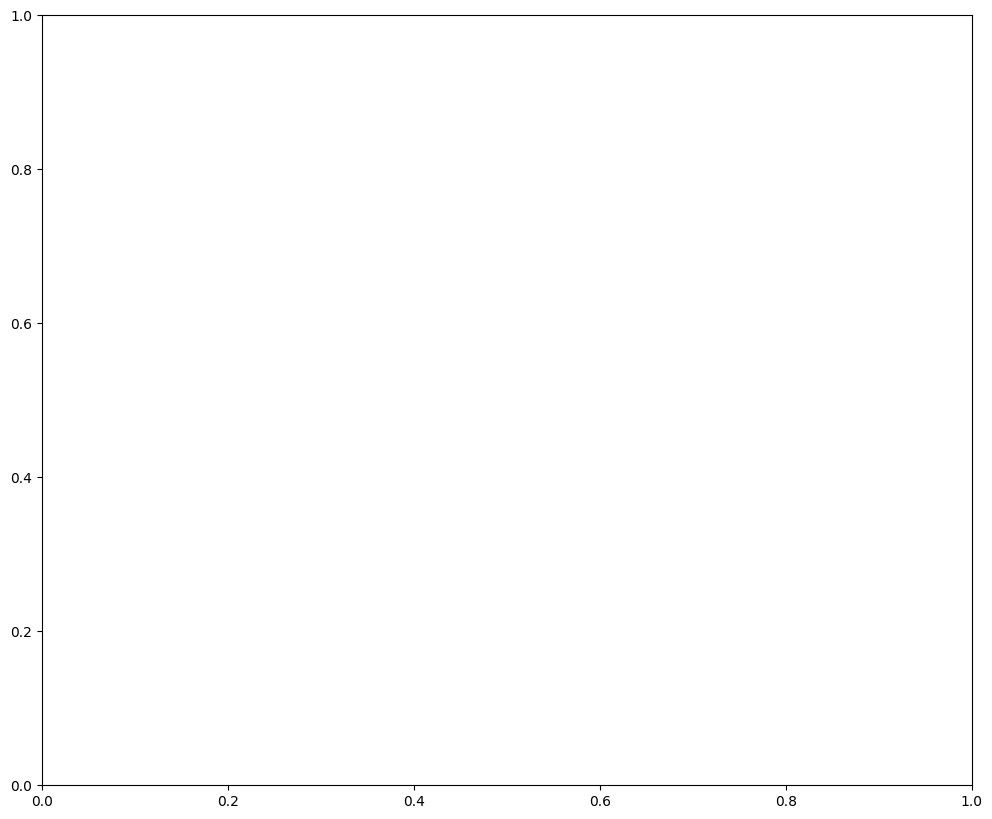

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, Nadam

# Step 1: Generate a synthetic dataset with moderate noise (same)
X, y = make_regression(n_samples=100, n_features=1, noise=5)
y = y.reshape(-1, 1)

# Step 2: Split the dataset into training and test sets (same)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Define a more complex neural network model (same)
model = Sequential([
    Dense(1024, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(1024, activation='relu'),
    Dense(1024, activation='relu'),
    Dense(512, activation='relu'),
    Dense(1)
])

# Compile the model (same)
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mse'])

# Step 4: Train the model for many epochs (too many)
history = model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test), verbose=0)

# Combine history from both training phases (same)
history_combined_loss = history.history['loss']
history_combined_val_loss = history.history['val_loss']

# Step 5: Visualize the loss on both the training and test datasets
plt.figure(figsize=(12, 10))  # Adjust for readability

# Plot loss for overfitting
plt.plot(range(1, len(history_combined_loss[5:]) + 1), history_combined_loss, label='Train Loss')
plt.plot(range(1, len(history_combined_val_loss[5:]) + 1), history_combined_val_loss, label='Test Loss')
plt.title('Overfitting (Too Many Epochs)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

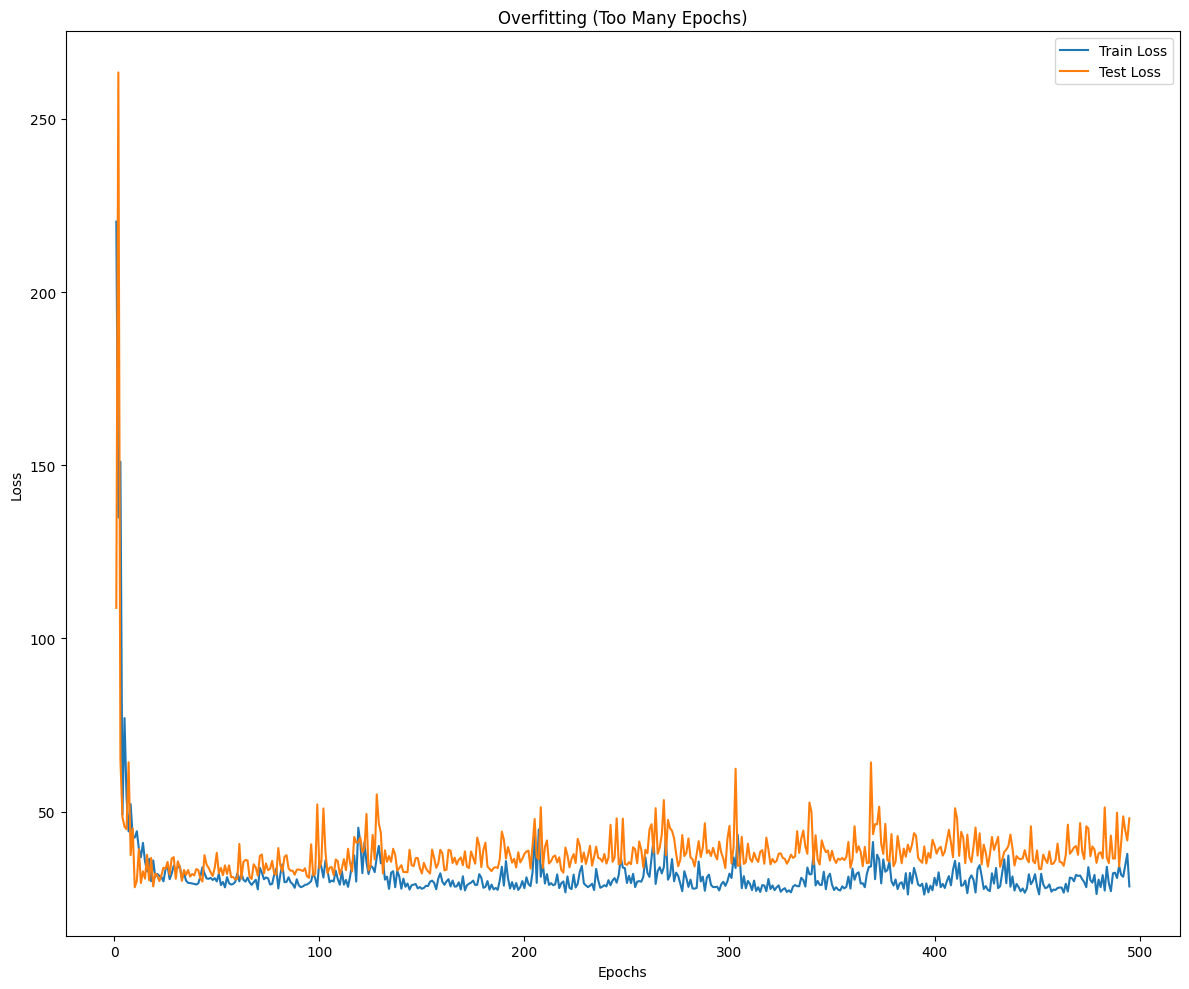

In [ ]:
# Step 5: Visualize the loss on both the training and test datasets
plt.figure(figsize=(12, 10))  # Adjust for readability

# Plot loss for overfitting
plt.plot(range(1, len(history_combined_loss[5:]) + 1), history_combined_loss[5:], label='Train Loss')
plt.plot(range(1, len(history_combined_val_loss[5:]) + 1), history_combined_val_loss[5:], label='Test Loss')
plt.title('Overfitting (Too Many Epochs)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

## Приклад практичної реалізації нейронної мережі з недонавчанням (under-fitting)

Недонавчання (underfitting) - це ситуація, коли модель машинного навчання або нейронна мережа не здатні достатньо добре навчитися патернам в навчальних даних. Це означає, що модель демонструє погану продуктивність як на тренувальних, так і на тестових даних. Основні причини та характеристики недонавчання включають:

* Недостатня складність моделі: Модель має занадто мало параметрів або шарів для вивчення складних патернів в даних.
* Недостатня кількість епох навчання: Модель не навчалася достатньо довго, щоб знайти оптимальні значення параметрів.
* Відсутність відповідних ознак (features): Вхідні дані не містять важливих ознак, необхідних для вивчення цільової змінної.
* Надмірна регуляризація: Сильна регуляризація може обмежити здатність моделі навчатися складним патернам.

Ознаки недонавчання

* Високі значення похибок на тренувальних даних.
* Відсутність покращення на валідаційних даних при збільшенні епох навчання.
* Низька варіативність похибок: Похибки на тренувальних та валідаційних даних приблизно однакові і високі.

**Як уникнути недонавчання?**

* Використовувати більш складні моделі: Перехід до більш складних моделей, таких як нейронні мережі з кількома шарами або інші нелінійні моделі.
* Додавання ознак: Інженерія ознак для виявлення більш релевантних ознак з даних.
* Збільшення кількості епох навчання: Навчання моделі протягом більш тривалого часу.
* Зменшення регуляризації: Послаблення регуляризаційних параметрів для дозволу моделі навчитися більш складним патернам.

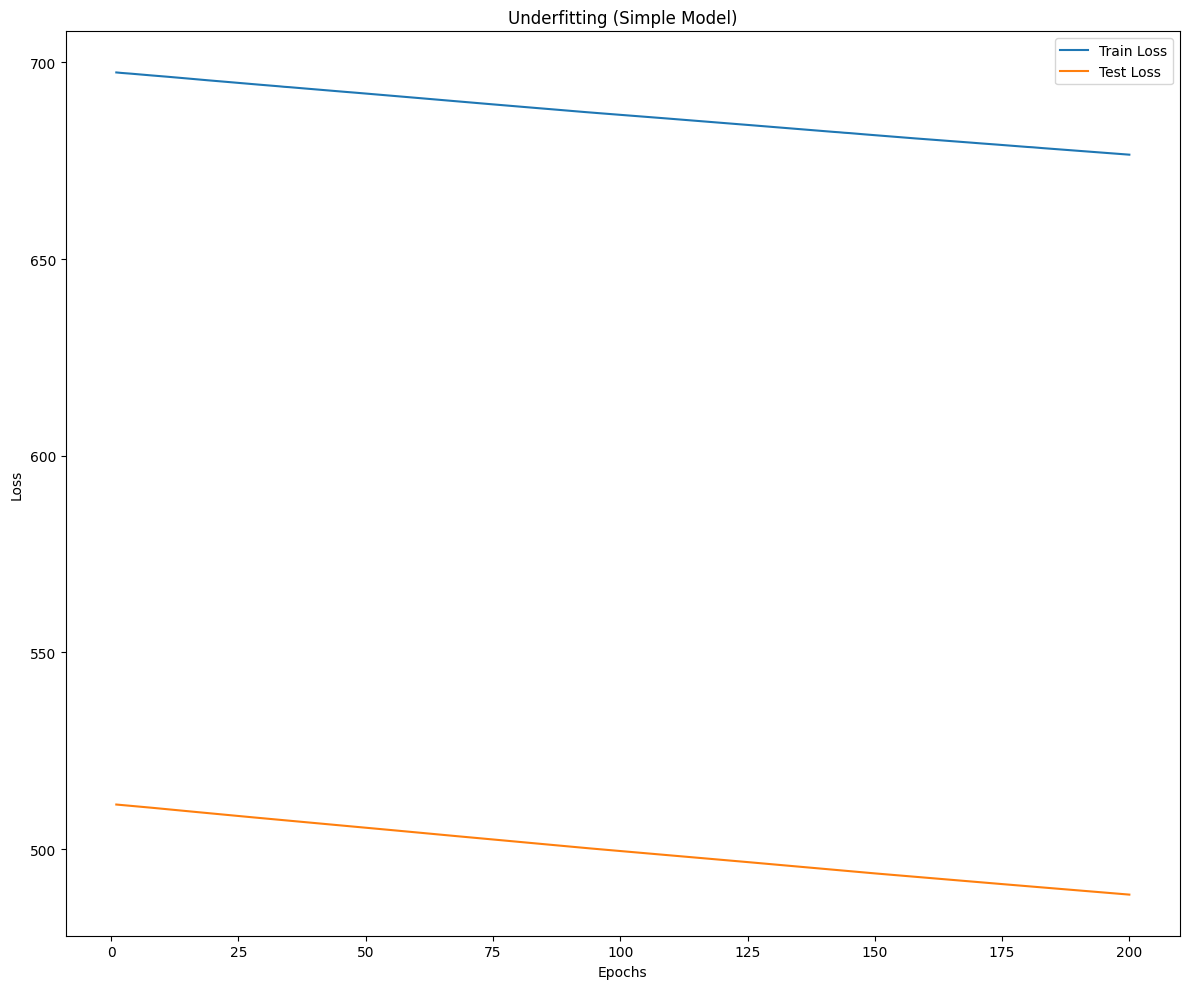

In [ ]:
# Step 3: Define a very simple neural network model (underfitting)
model = Sequential([
  Dense(1, activation='relu', input_shape=(X_train.shape[1],))  # Single neuron output layer
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mse'])

# Step 4: Train the model with a sufficient number of epochs
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), verbose=0)

# Combine history from both training phases (similar to overfitting example)
history_combined_loss = history.history['loss']
history_combined_val_loss = history.history['val_loss']

# Step 6: Visualize the loss on both the training and test datasets
plt.figure(figsize=(12, 10))  # Adjust for readability

# Plot loss for underfitting
plt.plot(range(1, 201), history_combined_loss, label='Train Loss')
plt.plot(range(1, 201), history_combined_val_loss, label='Test Loss')
plt.title('Underfitting (Simple Model)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()


## Приклад практичної реалізації нейронної мережі з ранньою зупинкою (early stoping)

Early Stopping (дослівно "раннє зупинення") - це метод регуляризації, який запобігає перенавчанню нейронної мережі шляхом зупинки навчання до того, як модель почне вчитися шуму з тренувальних даних. Ідея полягає в тому, щоб зупинити навчання, коли продуктивність моделі на валідаційних даних починає погіршуватися, навіть якщо на тренувальних даних вона продовжує покращуватися.

Основні кроки Early Stopping
* Розділення даних: Виділення частини тренувальних даних для валідації.
* Моніторинг валідаційної похибки: Під час навчання моделі постійно перевіряється похибка на валідаційних даних.
* Збереження найкращої моделі: Модель зберігається, коли валідаційна похибка є найнижчою.
*Зупинка навчання: Якщо валідаційна похибка починає збільшуватися (перенавчання), навчання зупиняється.

Переваги Early Stopping

* Запобігання перенавчанню: Зупиняючи навчання до перенавчання, модель залишається більш узагальненою.
* Зменшення часу навчання: Навчання може зупинятися раніше, що економить ресурси.
* Автоматизація процесу регуляризації: Немає необхідності вибирати параметри регуляризації вручну.

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


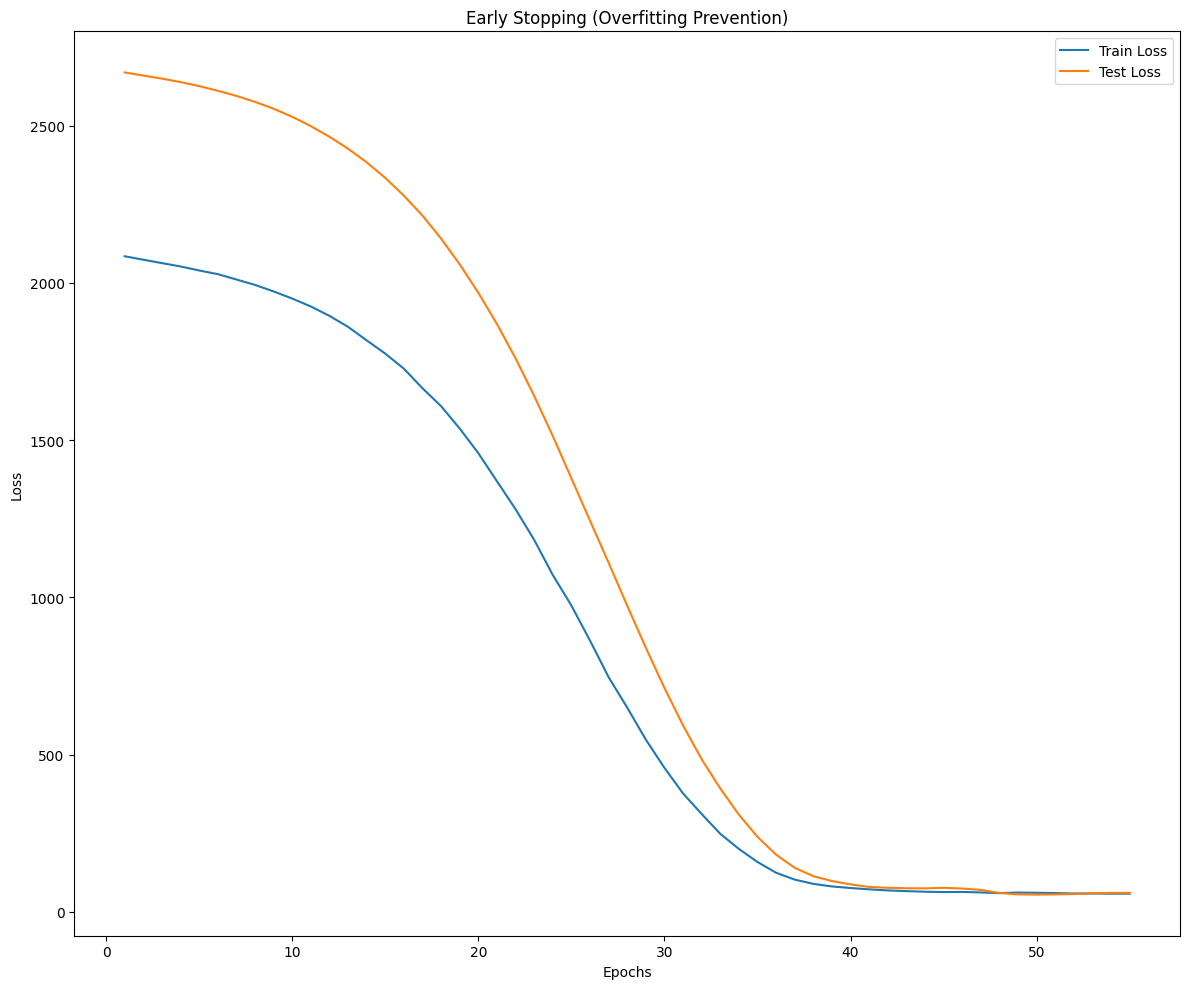

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping


# Step 3: Define a more complex neural network model (same as overfitting)
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1)
])

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error', metrics=['mse'])

# Step 4: Define Early Stopping callback (introduce patience)
early_stopping = EarlyStopping(monitor='val_loss', patience=5)  # Monitor validation loss, stop after 5 epochs of no improvement

# Step 5: Train the model with Early Stopping
history = model.fit(X_train, y_train, epochs=200, validation_data=(X_test, y_test), callbacks=[early_stopping], verbose=0)

# Combine history from both training phases (similar to previous examples)
history_combined_loss = history.history['loss']
history_combined_val_loss = history.history['val_loss']

# Step 6: Visualize the loss on both the training and test datasets
plt.figure(figsize=(12, 10))  # Adjust for readability

# Plot loss for early stopping
plt.plot(range(1, len(history_combined_loss) + 1), history_combined_loss, label='Train Loss')
plt.plot(range(1, len(history_combined_val_loss) + 1), history_combined_val_loss, label='Test Loss')
plt.title('Early Stopping (Overfitting Prevention)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.tight_layout()
plt.show()

# Додаткові матеріали

1. Наочне пояснення по стохастичному град. спуску з моментами: https://towardsdatascience.com/stochastic-gradient-descent-with-momentum-a84097641a5d
2. В продовження першого: https://paperswithcode.com/method/sgd-with-momentum
3. По матриці Гессе: https://www.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/quadratic-approximations/a/the-hessian
https://www.youtube.com/watch?v=_Ffcr98c7EE  (https://www.youtube.com/watch?v=_Ffcr98c7EE)
4. По лінійній регресії додаткова теорія: https://www.analyticsvidhya.com/blog/2021/10/everything-you-need-to-know-about-linear-regression/
5. ADAM: https://machinelearningmastery.com/adam-optimization-from-scratch/
6. Сідлова точка, візуалізація: https://www.youtube.com/watch?v=8aAU4r_pUUU
7. Візуалізація тесту на другу похідну: https://www.youtube.com/watch?v=sJo7D74PAak
8. https://towardsdatascience.com/batch-mini-batch-stochastic-gradient-descent-7a62ecba642a
9. https://www.khanacademy.org/math/multivariable-calculus/applications-of-multivariable-derivatives/optimizing-multivariable-functions/a/maximums-minimums-and-saddle-points